In [8]:
import pandas as pd
import numpy as np
data=pd.read_csv("mental_health.csv")
data.head(10)


Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   
5  Afghanistan  AFG  1995   
6  Afghanistan  AFG  1996   
7  Afghanistan  AFG  1997   
8  Afghanistan  AFG  1998   
9  Afghanistan  AFG  1999   

   Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.228979                          
1                                           0.228120                          
2                                           0.227328                          
3                                           0.226468                          
4                                           0.225567                          
5                                           0.224713                          
6                                           0.223690                          
7                                           0.222424                          
8                                           0.221129                          
9                                           0.220065                          

   Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.721207                             
1                                           0.719952                             
2                                           0.718418                             
3                                           0.717452                             
4                                           0.717012                             
5                                           0.716686                             
6                                           0.716388                             
7                                           0.716143                             
8                                           0.716139                             
9                                           0.716323                             

   Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           0.131001                             
1                                           0.126395                             
2                                           0.121832                             
3                                           0.117942                             
4                                           0.114547                             
5                                           0.111129                             
6                                           0.107786                             
7                                           0.103931                             
8                                           0.100343                             
9                                           0.097946                             

   Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)  \
0                                           4.835127                              
1                                           4.821765                              
2                                           4.801434                              
3                                           4.789363                              
4                                           4.784923                              
5                                           4.780851                              
6                                           4.777272                              
7                                           4.775242                              
8                                           4.777377                              
9                                           4.782067                              

   Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)  \
0             

In [9]:
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:
data.isnull().sum()
data.drop('Code',axis=1,inplace=True)


In [11]:
data.set_axis(['country','year','Schizophrenia','Bipolar','Eating','Anxiety','DrugUse','Depressive','Alcohol','Mental_fitness'],axis='columns',inplace=True)

In [12]:
data.size,data.shape


(68400, (6840, 10))

In [13]:
data.head(10)

country  year  Schizophrenia   Bipolar    Eating   Anxiety   DrugUse  \
0  Afghanistan  1990       0.228979  0.721207  0.131001  4.835127  0.454202   
1  Afghanistan  1991       0.228120  0.719952  0.126395  4.821765  0.447112   
2  Afghanistan  1992       0.227328  0.718418  0.121832  4.801434  0.441190   
3  Afghanistan  1993       0.226468  0.717452  0.117942  4.789363  0.435581   
4  Afghanistan  1994       0.225567  0.717012  0.114547  4.784923  0.431822   
5  Afghanistan  1995       0.224713  0.716686  0.111129  4.780851  0.428578   
6  Afghanistan  1996       0.223690  0.716388  0.107786  4.777272  0.426393   
7  Afghanistan  1997       0.222424  0.716143  0.103931  4.775242  0.423720   
8  Afghanistan  1998       0.221129  0.716139  0.100343  4.777377  0.422491   
9  Afghanistan  1999       0.220065  0.716323  0.097946  4.782067  0.421215   

   Depressive   Alcohol  Mental_fitness  
0    5.125291  0.444036       16.659229  
1    5.116306  0.444250       16.765052  
2    5.106558  0.445501       16.874469  
3    5.100328  0.445958       16.990720  
4    5.099424  0.445779       17.112730  
5    5.098495  0.445422       17.236307  
6    5.100580  0.444837       17.390301  
7    5.105474  0.443938       17.570980  
8    5.113707  0.442665       17.748169  
9    5.120480  0.441428       17.881631

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

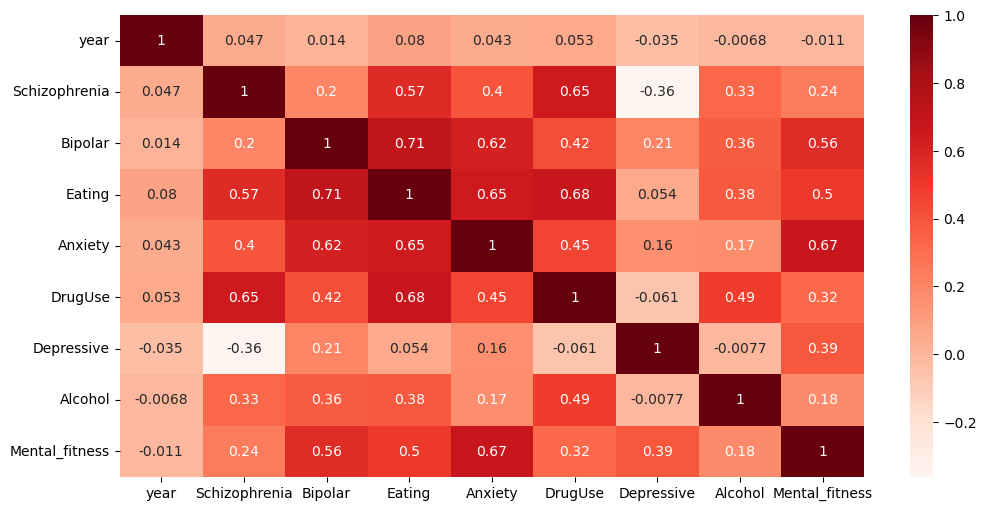

In [14]:
plt.figure(figsize=(12,6))
sb.heatmap(data.corr(),annot=True,cmap='Reds')
plt.plot

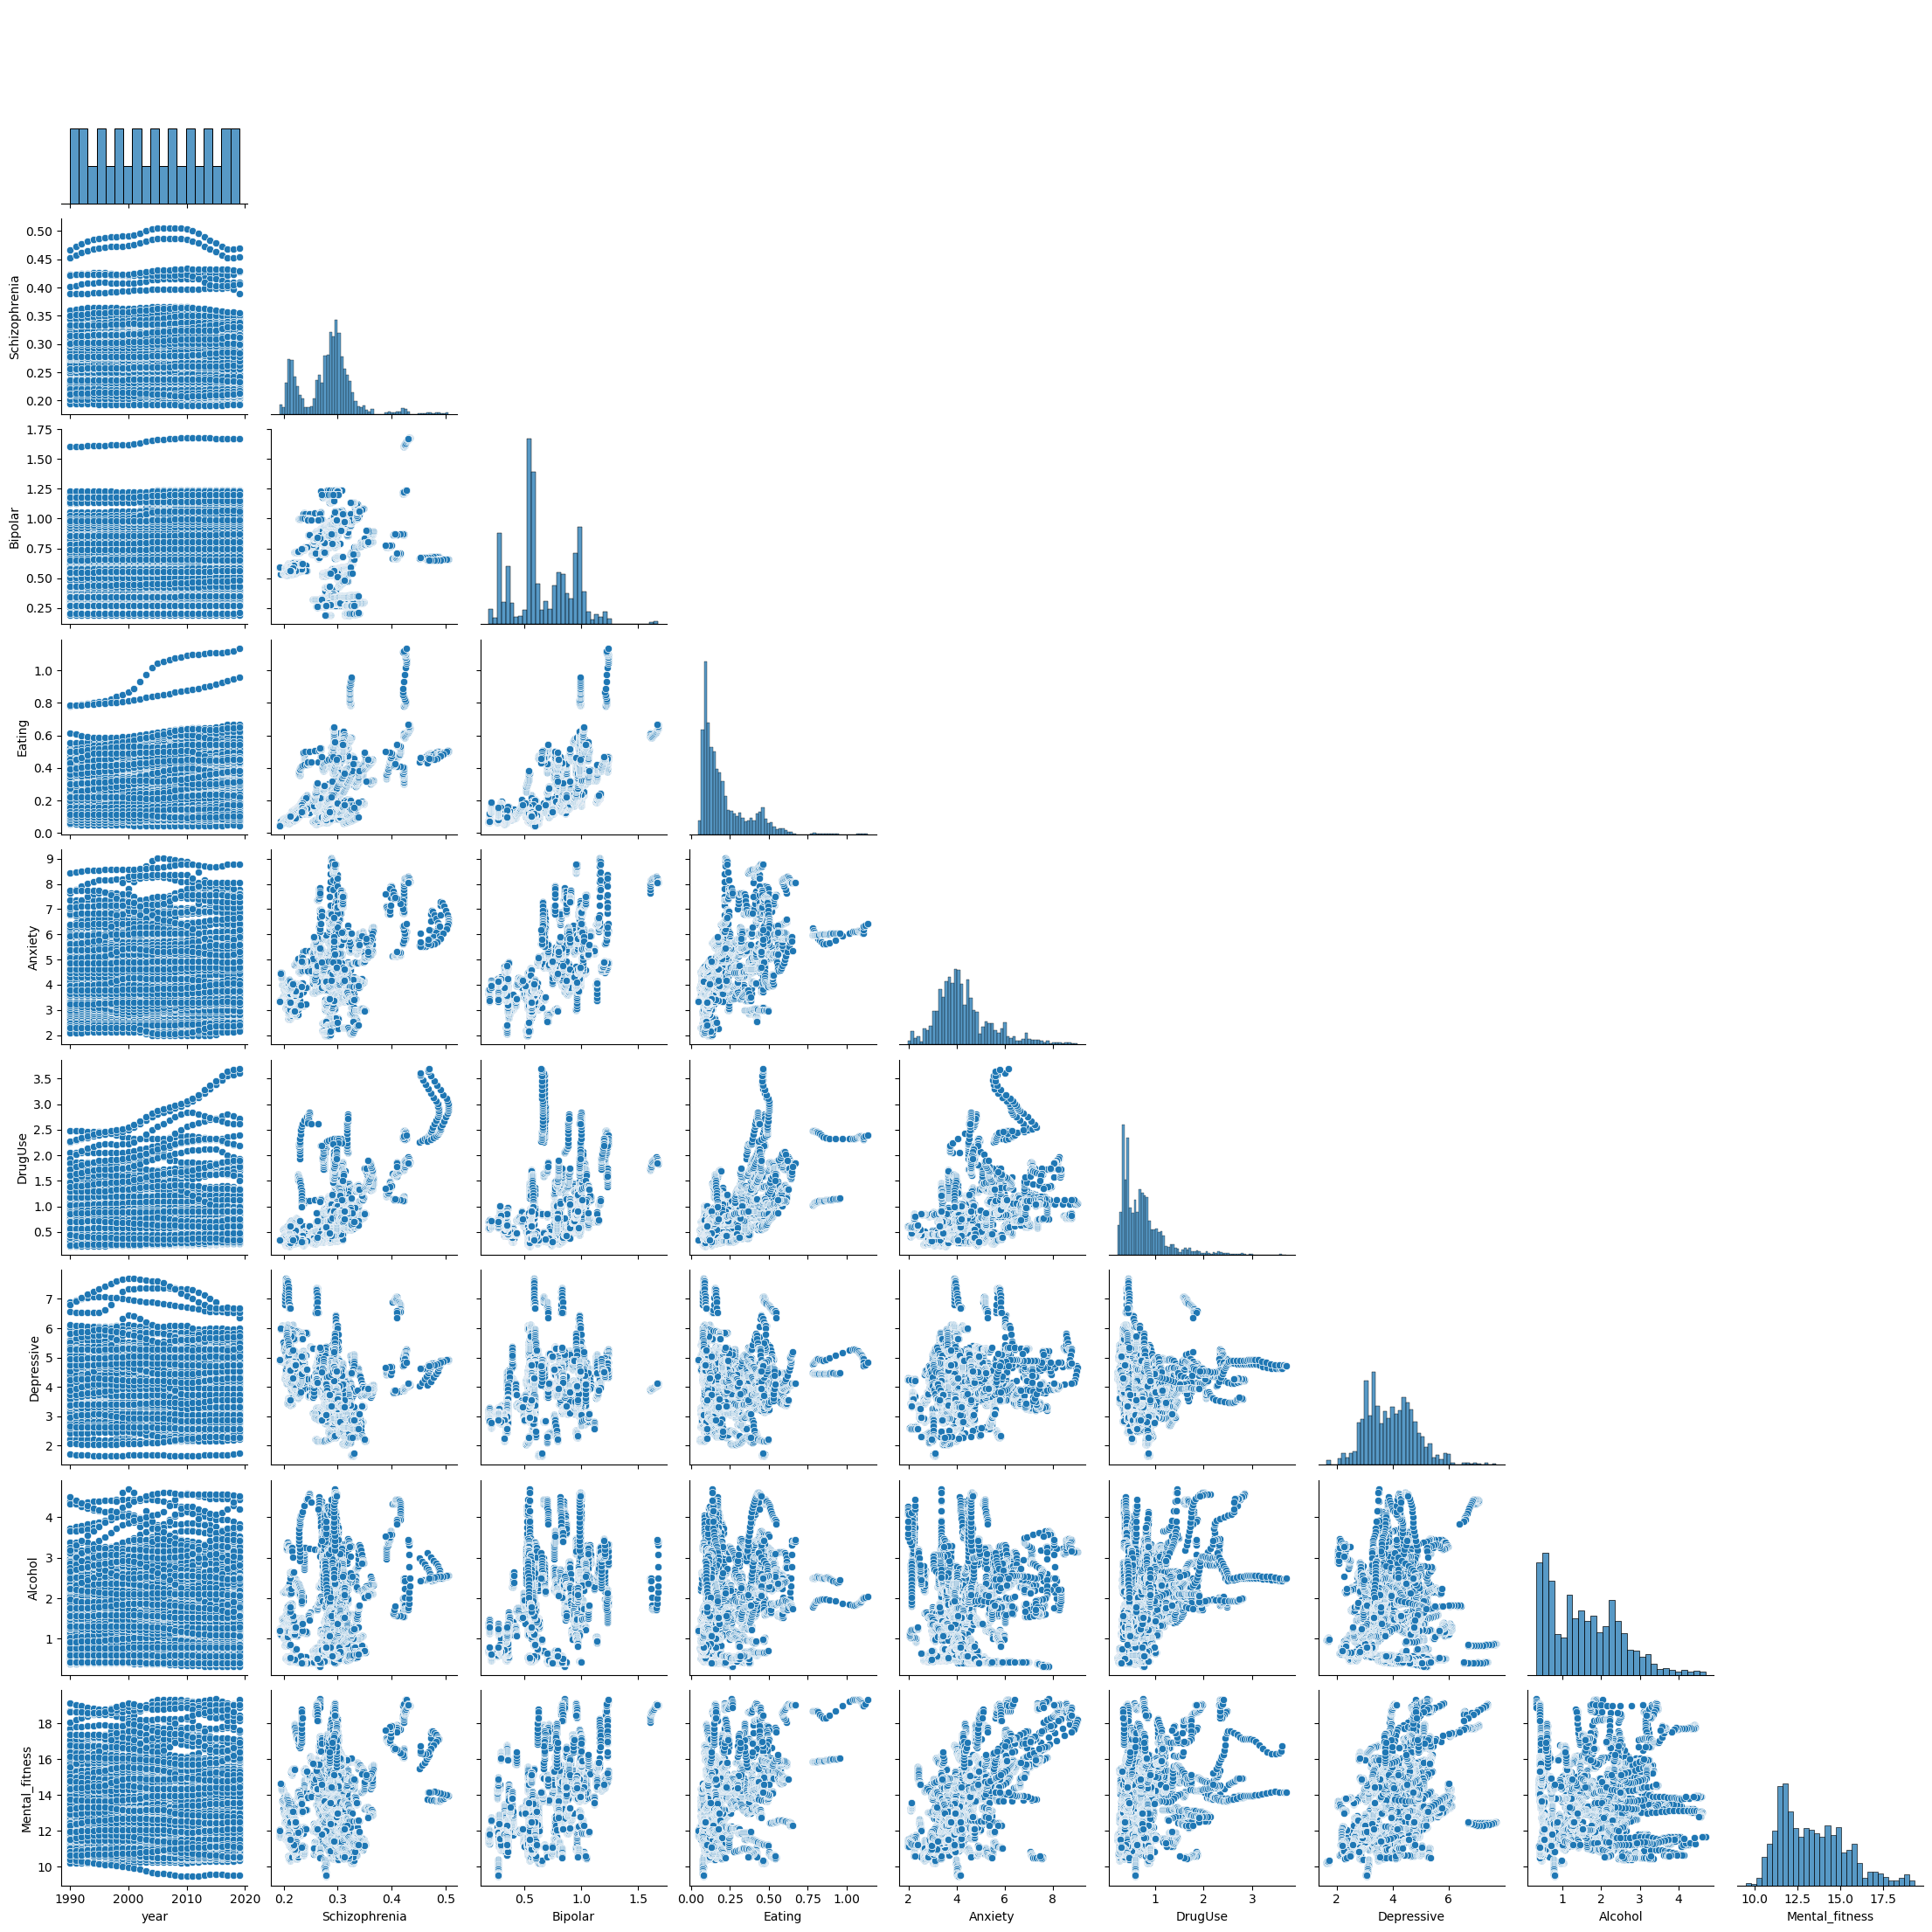

In [15]:
sb.pairplot(data,corner=True)
plt.show()

In [16]:
mean=data['Mental_fitness'].mean()
mean

13.390713476518568

In [17]:
fig=px.pie(data,values='Mental_fitness',names='year')
fig.show()

In [18]:
fig=px.line(data,x='year',y='Mental_fitness',color='country',markers=True,color_discrete_sequence=['red','yellow'],template='plotly_dark')
fig.show()

In [19]:
df=data
valid_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[valid_columns] = df[valid_columns].fillna(df[valid_columns].mean())


In [20]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=l.fit_transform(df[i])

In [21]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.shape

(6840, 10)

In [22]:
x=df.drop('Mental_fitness',axis=1)
y=df['Mental_fitness']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20,random_state=2)

In [23]:
print('xtrain',xtrain.shape)
print('xtest', xtest.shape)
print('\n ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain (5472, 9)
xtest (1368, 9)

 ytrain: (5472,)
ytest: (1368,)


In [24]:
# linear regression model for training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ytrain_pred=lr.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)

print("The Linear Regression model performance for training set")
print("------------------------------------------------------")
print("MSE is {}".format(mse))
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

# RandomForest regression model for training set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
ytest_pred=rf.predict(xtrain)
mse=mean_squared_error(ytrain,ytrain_pred)
rmse=(np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
r2=r2_score(ytrain,ytrain_pred)

print("\nThe RandomForestRegression model performance for training set")
print("------------------------------------------------------")
print("MSE is {}".format(mse))
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))




The Linear Regression model performance for training set
------------------------------------------------------
MSE is 1.6675265377340405
RMSE is 1.2913274324252701
R2 score is 0.5598763262439436

The RandomForestRegression model performance for training set
------------------------------------------------------
MSE is 1.6675265377340405
RMSE is 1.2913274324252701
R2 score is 0.5598763262439436


In [25]:
#linear regression model for test set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(xtest,ytest)
ytest_pred=lr.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

print("The Linear Regression model performance for test set")
print("------------------------------------------------------")
print("MSE is {}".format(mse))
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))

# RandomForest regression model for test set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtest,ytest)
ytest_pred=rf.predict(xtest)
mse=mean_squared_error(ytest,ytest_pred)
rmse=(np.sqrt(mean_squared_error(ytest,ytest_pred)))
r2=r2_score(ytest,ytest_pred)

print("\nThe RandomForestRegression model performance for test set")
print("------------------------------------------------------")
print("MSE is {}".format(mse))
print("RMSE is {}".format(rmse))
print("R2 score is {}".format(r2))


The Linear Regression model performance for test set
------------------------------------------------------
MSE is 1.5698396974474378
RMSE is 1.2529324392988785
R2 score is 0.603659153690749

The RandomForestRegression model performance for test set
------------------------------------------------------
MSE is 0.014686507036267461
RMSE is 0.1211878997106042
R2 score is 0.996292065592719


In [26]:
def predict_mental_fitness(Schizophrenia, Bipolar, Eating, Anxiety, DrugUse, Depressive, Alcohol, year, country):
    input_data = pd.DataFrame([[country, year, Schizophrenia, Bipolar, Eating, Anxiety, DrugUse, Depressive, Alcohol]], columns=x.columns)
    input_data['country'] = l.transform([country])[0]  # Encode country
    prediction_lr = lr.predict(input_data)[0]
    prediction_rf = rf.predict(input_data)[0]
    return prediction_lr, prediction_rf



In [2]:
# Example usage:
Schizophrenia = float(input("Enter Schizophrenia: "))
Bipolar = float(input("Enter Bipolar: "))
Eating = float(input("Enter Eating: "))
Anxiety = float(input("Enter Anxiety: "))
DrugUse = float(input("Enter Drug Use: "))
Depressive = float(input("Enter Depressive: "))
Alcohol = float(input("Enter Alcohol: "))
year = int(input("Enter year: "))
country = input("Enter country: ")

Enter Schizophrenia: 0.228979


In [27]:
lr_pred, rf_pred = predict_mental_fitness(Schizophrenia, Bipolar, Eating, Anxiety, DrugUse, Depressive, Alcohol, year, country)
print(f"Predicted Mental Fitness (Linear Regression): {lr_pred}")
print(f"Predicted Mental Fitness (Random Forest): {rf_pred}")

Enter Drug Use: 0.43443
Enter Depressive: 3.212121
Enter Alcohol: 1.2121
Enter year: 2024
Enter country: Afghanistan
Predicted Mental Fitness (Linear Regression): 12.698877342114166
Predicted Mental Fitness (Random Forest): 14.378056161200004
